# **Tame Your Python**

Let's see how we can classify emails based on their contents

`Leggo`


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

In [0]:
def plot_dataset(X):
  plt.scatter(X[:,0], X[:,1])
  plt.show()

In [0]:
def evaluation_labels(y, y_pred):
  from sklearn import metrics
  adj_rand = metrics.adjusted_rand_score(y, y_pred)
  print("Adjusted Rand Score = " + str(adj_rand))

  adj_mi = metrics.adjusted_mutual_info_score(y, y_pred)
  print("Adjusted Mutual Information = " + str(adj_mi))

  h = metrics.homogeneity_score(y, y_pred)
  print("Homogeneity = " + str(h))

  v = metrics.v_measure_score(y, y_pred)
  print("V-measure = " + str(v))

  c = metrics.completeness_score(y, y_pred)
  print("Completeness = " + str(c))

  f = metrics.fowlkes_mallows_score(y, y_pred)
  print("Fowlkes-Mallows = " + str(f))

  return

def evaluation(X, y_pred):
  from sklearn import metrics  
  s = metrics.silhouette_score(X, y_pred, metric='euclidean')
  print("Silhouette Coefficient = " + str(s))

  c = metrics.calinski_harabasz_score(X, y_pred)
  print("Calinski-Harabasz  = " + str(c))

  d = metrics.davies_bouldin_score(X, y_pred)
  print("Davies-Bouldin  = " + str(d))

  return

In [0]:
def visual(c, X, y):
  y = np.floor(y)
  from sklearn.cluster import KMeans
  cluster_object = KMeans(n_clusters = c, init = 'k-means++')
  y_pred = cluster_object.fit_predict(X)
  colors = ['red', 'green', 'blue', 'cyan', 'black', 'yellow', 'magenta', 'brown', 'orange', 'silver', 'goldenrod', 'olive', 'dodgerblue', 'turqoise']
  clusters = np.unique(y_pred)
  print("Cluster Labels")
  print(clusters)
  print("Evaluation")
  evaluation_labels(y, y_pred)
  evaluation(X, y_pred)
  for cluster in clusters:
    row_idx = np.where(y== cluster)
    plt.scatter(X[row_idx, 0], X[row_idx, 1])
  plt.title('Dataset')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.legend()
  plt.show()

  plt.figure()
  for cluster in clusters:
    row_idx = np.where(y_pred == cluster)
    plt.scatter(X[row_idx, 0], X[row_idx, 1])
  plt.title('Cluster')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.legend()
  plt.show()


In [0]:
def visual_elbow(X):
  from sklearn.cluster import KMeans
  wcss = []
  for i in range(1, 20):
      kmeans = KMeans(n_clusters = i, init = 'k-means++')
      kmeans.fit(X)
      wcss.append(kmeans.inertia_)
  plt.scatter(range(1, 20), wcss)
  plt.title('The Elbow Method')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')
  plt.show()
  plt.clf()


## Get the dataset

In [0]:
n = 1000
from sklearn.datasets import make_moons, make_blobs, make_circles, make_s_curve
X_moons, y_moons = make_moons(n_samples = n, noise=0.1)
X_blobs, y_blobs = make_blobs(n_samples = n, n_features = 2)
X_circles, y_circles = make_circles(n_samples=n, noise=0.1, factor = 0.5)
X_scurve, y_scurve = make_s_curve(n_samples=n, noise = 0.1)
X_random = np.random.random([n, 2])
y_random = np.random.randint(0,3,size = [n])
transformation = [[0.80834549, -0.83667341], [-0.20887718, 0.85253229]]
X_aniso = np.dot(X_blobs, transformation)
y_aniso = y_blobs

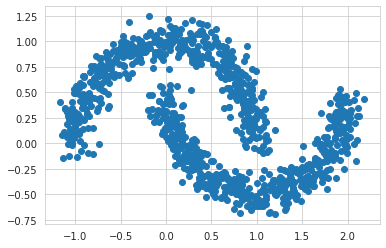

In [247]:
plot_dataset(X_moons)

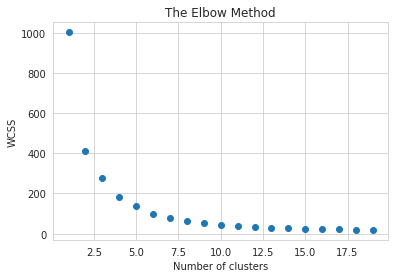

<Figure size 432x288 with 0 Axes>

In [248]:
visual_elbow(X_moons)

No handles with labels found to put in legend.


Cluster Labels
[0 1 2 3 4 5 6 7 8 9]
Evaluation
Adjusted Rand Score = 0.19611234559311266
Adjusted Mutual Information = 0.4499695882528094
Homogeneity = 0.9751568063800607
V-measure = 0.4516326514390294
Completeness = 0.2938668505176832
Fowlkes-Mallows = 0.442681220374027
Silhouette Coefficient = 0.4633985934052523
Calinski-Harabasz  = 2363.0438890183927
Davies-Bouldin  = 0.6364201915746216


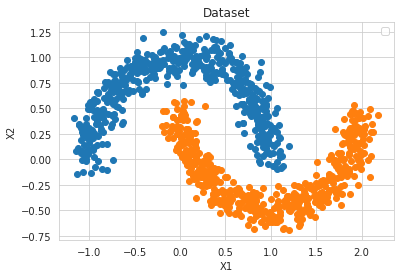

No handles with labels found to put in legend.


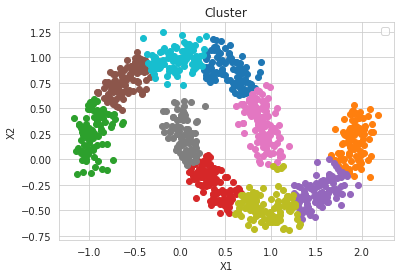

In [249]:
visual(10, X_moons, y_moons)

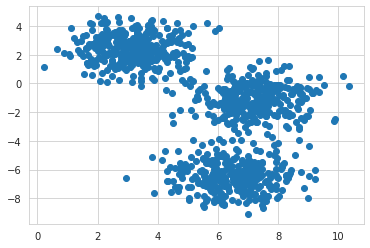

In [250]:
plot_dataset(X_blobs)

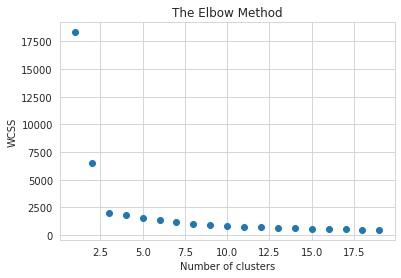

No handles with labels found to put in legend.


Cluster Labels
[0 1 2]
Evaluation
Adjusted Rand Score = 0.9850616308503923
Adjusted Mutual Information = 0.9714974085619936
Homogeneity = 0.97154810826752
V-measure = 0.9715494361121766
Completeness = 0.9715507639604627
Fowlkes-Mallows = 0.990031143278588
Silhouette Coefficient = 0.6503004588640695
Calinski-Harabasz  = 4010.1601057105613
Davies-Bouldin  = 0.471795256849747


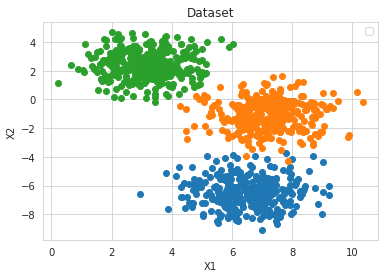

No handles with labels found to put in legend.


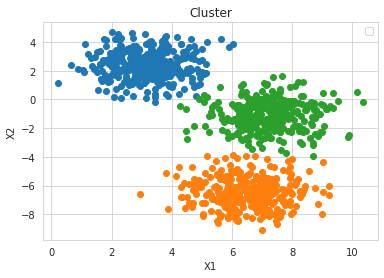

In [251]:
visual_elbow(X_blobs)
visual(3, X_blobs, y_blobs)

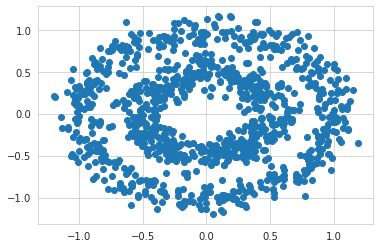

In [252]:
plot_dataset(X_circles)

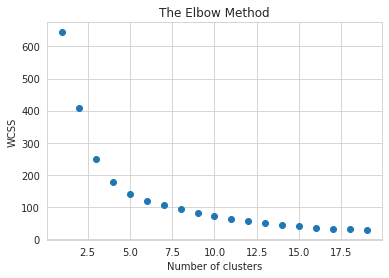

No handles with labels found to put in legend.


Cluster Labels
[0 1 2]
Evaluation
Adjusted Rand Score = -0.0012603247257651873
Adjusted Mutual Information = -0.001055769089187621
Homogeneity = 8.256817716191857e-05
V-measure = 6.388413935422987e-05
Completeness = 5.2095620205642636e-05
Fowlkes-Mallows = 0.4068703469761095
Silhouette Coefficient = 0.38714282644852616
Calinski-Harabasz  = 790.0208437874857
Davies-Bouldin  = 0.8397640843614829


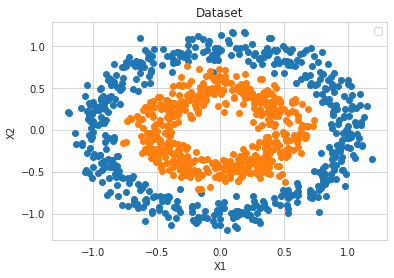

No handles with labels found to put in legend.


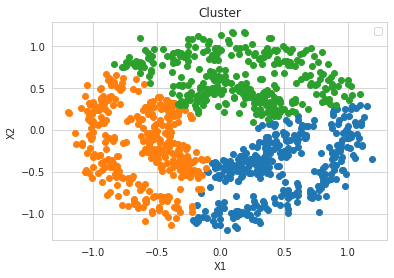

In [253]:
visual_elbow(X_circles)
visual(3, X_circles, y_circles)

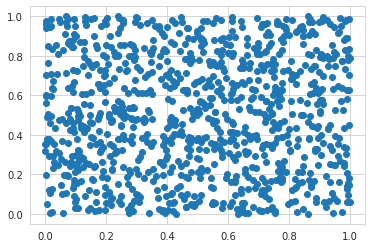

In [254]:
plot_dataset(X_random)

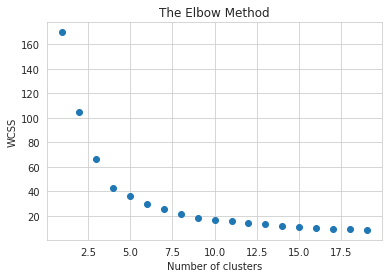

No handles with labels found to put in legend.


Cluster Labels
[0 1 2]
Evaluation
Adjusted Rand Score = -0.0010839107353576146
Adjusted Mutual Information = -0.0010837880437254718
Homogeneity = 0.0007457121379009981
V-measure = 0.0007466287076854543
Completeness = 0.0007475475333914164
Fowlkes-Mallows = 0.3331586540230421
Silhouette Coefficient = 0.38489745430750283
Calinski-Harabasz  = 779.9564235315916
Davies-Bouldin  = 0.8504377761973831


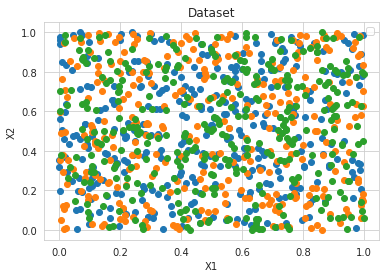

No handles with labels found to put in legend.


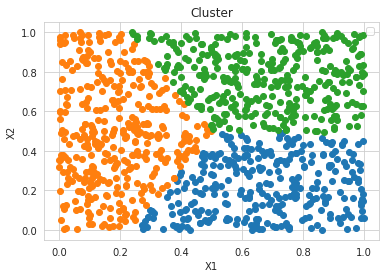

In [255]:
visual_elbow(X_random)
visual(3, X_random, y_random)

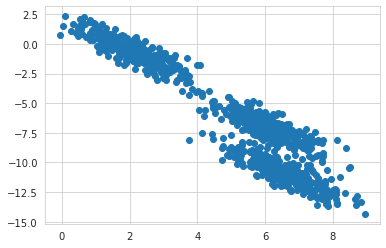

In [256]:
plot_dataset(X_aniso)

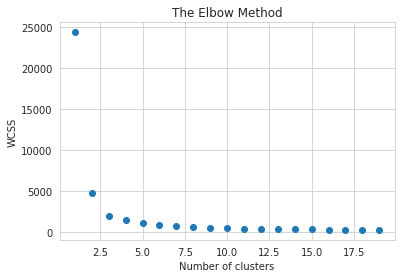

No handles with labels found to put in legend.


Cluster Labels
[0 1 2]
Evaluation
Adjusted Rand Score = 0.8630619602957049
Adjusted Mutual Information = 0.8350615690090192
Homogeneity = 0.8352574766807297
V-measure = 0.8353626793842561
Completeness = 0.8354679085921918
Fowlkes-Mallows = 0.908629323721504
Silhouette Coefficient = 0.6464720555891001
Calinski-Harabasz  = 5946.108983758981
Davies-Bouldin  = 0.46825274512098475


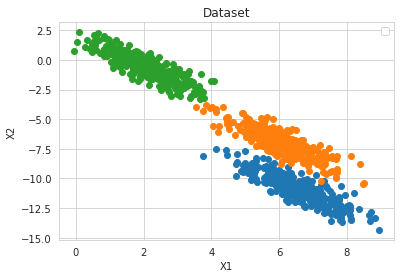

No handles with labels found to put in legend.


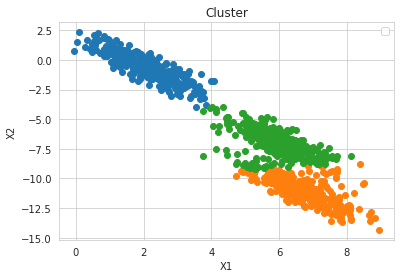

In [257]:
visual_elbow(X_aniso)
visual(3, X_aniso, y_aniso)